In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.graph_objects as go
import scipy.stats as stats
import warnings

In [2]:
df = pd.read_excel('/content/Adidas US Sales Datasets.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '/content/Adidas US Sales Datasets.xlsx'

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


# Data Understanding

| **Kolom**            | **Deskripsi**                                                          |
| -------------------- | ---------------------------------------------------------------------- |
| **Retailer**         | Nama perusahaan yang membeli produk Adidas.                       |
| **Retailer ID**      | Nomor unik identifikasi setiap retailer.                               |
| **Invoice Date**     | Tanggal terjadinya transaksi.                    |
| **Region**           | Wilayah geografis besar tempat retailer berada |
| **State**            | Nama negara bagian tempat retailer berada.                             |
| **City**             | Nama kota tempat retailer berada.                                      |
| **Product**          | Kategori produk yang dibeli retailer         |
| **Price per Unit**   | Harga jual per unit produk (dalam USD).                                |
| **Units Sold**       | Jumlah unit produk yang terjual di transaksi tersebut.                 |
| **Total Sales**      | Nilai total penjualan (Price per Unit × Units Sold).                   |
| **Operating Profit** | Laba operasional yang dihasilkan dari transaksi tersebut.              |
| **Operating Margin** | Persentase laba operasional dari total penjualan.                      |
| **Sales Method**     | Metode penjualan                   |



In [ ]:
df.shape

(9652, 14)

# Data Cleaning

In [ ]:
df = df.drop([0,1,2])

In [ ]:
df.drop(columns = "Unnamed: 0",inplace =True)

In [ ]:
df.columns = df.iloc[0,:]

In [ ]:
df["Operating Margin"] = df["Operating Margin"] * 100

In [ ]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating MarginOperating MarginOperating Marg...,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,50.0,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,30.0,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,35.0,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,35.0,In-store


In [ ]:
# drop baris 0 dan reset index
df = df.drop(3).reset_index(drop=True)
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,50.0,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,30.0,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,35.0,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,35.0,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30.0,In-store


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [ ]:
# ganti dtypes price per unit, units sold, total sales, operating profit, operating margin jadi int
df['Units Sold'] = df['Units Sold'].astype(int)
df['Total Sales'] = df['Total Sales'].astype(int)
df['Operating Profit'] = df['Operating Profit'].astype(int)
df['Operating Margin'] = df['Operating Margin'].astype(int)
df['Price per Unit'] = df['Price per Unit'].astype(int)

In [ ]:
df = df[pd.to_datetime(df['Invoice Date'], errors='coerce').notna()]

df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['Day'] = df['Invoice Date'].dt.day
df['Month'] = df['Invoice Date'].dt.month
df['Year'] = df['Invoice Date'].dt.year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   int64         
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   int64         
 10  Operating Profit  9648 non-null   int64         
 11  Operating Margin  9648 non-null   int64         
 12  Sales Method      9648 non-null   object        
 13  Day               9648 non-null   int32         
 14  Month             9648 n

In [ ]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Day,Month,Year
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,50,In-store,1,1,2020
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,30,In-store,2,1,2020
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,35,In-store,3,1,2020
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,35,In-store,4,1,2020
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30,In-store,5,1,2020


## Duplicate Handling

In [ ]:
#melihat duplikat pada data, jika output bernilai 1 maka tidak terdapat duplikat
len(df.drop_duplicates())/len(df)

1.0

No Duplicate

## Missing value

In [ ]:
# melihat mising value
df.isna().sum()

,0
3,
Retailer,0
Retailer ID,0
Invoice Date,0
Region,0
State,0
City,0
Product,0
Price per Unit,0
Units Sold,0


No Missing Value

In [ ]:
for col in df.columns:
  print(f'===={col}====')
  display(df[col].value_counts())

====Retailer====


,count
Retailer,
Foot Locker,2637
West Gear,2374
Sports Direct,2032
Kohl's,1030
Amazon,949
Walmart,626


====Retailer ID====


,count
Retailer ID,
1185732,5265
1128299,2370
1197831,1653
1189833,360


====Invoice Date====


,count
Invoice Date,
2021-01-17,77
2021-03-16,72
2021-04-17,72
2021-08-17,72
2021-11-17,71
...,...
2020-12-12,2
2020-12-13,2
2020-12-14,2


====Region====


,count
Region,
West,2448
Northeast,2376
Midwest,1872
South,1728
Southeast,1224


====State====


,count
State,
Texas,432
California,432
New York,360
Florida,360
Nevada,216
Pennsylvania,216
Alabama,216
Tennessee,216
Arkansas,216


====City====


,count
City,
Portland,360
Charleston,288
San Francisco,216
New York,216
Los Angeles,216
Dallas,216
Las Vegas,216
Philadelphia,216
Birmingham,216


====Product====


,count
Product,
Men's Street Footwear,1610
Men's Athletic Footwear,1610
Women's Street Footwear,1608
Women's Apparel,1608
Women's Athletic Footwear,1606
Men's Apparel,1606


====Price per Unit====


,count
Price per Unit,
50,611
45,537
40,533
55,460
60,453
...,...
97,2
92,2
98,1


====Units Sold====


,count
Units Sold,
225,207
150,203
175,191
300,189
200,174
...,...
376,1
103,1
16,1


====Total Sales====


,count
Total Sales,
100000,62
135000,53
90000,52
180000,50
150000,49
...,...
3841,1
9156,1
8648,1


====Operating Profit====


,count
Operating Profit,
21000,38
52500,37
78750,37
45000,35
105000,34
...,...
4890,1
1328,1
4332,1


====Operating Margin====


,count
Operating Margin,
35,1309
40,1292
30,723
50,614
44,521
...,...
19,2
17,2
76,1


====Sales Method====


,count
Sales Method,
Online,4889
Outlet,3019
In-store,1740


====Day====


,count
Day,
17,687
10,611
24,448
13,445
12,439
11,424
6,421
18,397
23,396


====Month====


,count
Month,
1,861
8,853
4,841
9,824
5,820
10,814
3,802
11,795
2,776


====Year====


,count
Year,
2021,8346
2020,1302


Tidak ada yang aneh/berbeda dalam setiap kolom.

In [ ]:
# cek yang total sales = 0
df[df['Total Sales'] == 0]

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Day,Month,Year
1019,Foot Locker,1185732,2021-06-05,Midwest,Nebraska,Omaha,Women's Athletic Footwear,35,0,0,0,40,Outlet,5,6,2021
1025,Foot Locker,1185732,2021-06-11,Midwest,Nebraska,Omaha,Women's Athletic Footwear,30,0,0,0,40,Outlet,11,6,2021
4907,Foot Locker,1185732,2021-06-05,Midwest,Nebraska,Omaha,Women's Athletic Footwear,33,0,0,0,55,Online,5,6,2021
4913,Foot Locker,1185732,2021-06-11,Midwest,Nebraska,Omaha,Women's Athletic Footwear,27,0,0,0,53,Online,11,6,2021


In [ ]:
#drop baris yang total sales = 0
df = df[df['Total Sales'] != 0]

# Outlier

In [ ]:
data_kolom = df[['Total Sales', 'Operating Profit', 'Units Sold']]
data_kolom.head()

3,Total Sales,Operating Profit,Units Sold
0,600000,300000,1200
1,500000,150000,1000
2,400000,140000,1000
3,382500,133875,850
4,540000,162000,900


In [ ]:
def check_plot(df, data_kolom):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[data_kolom], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[data_kolom], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[data_kolom])
    plt.title('Boxplot')

    plt.show()

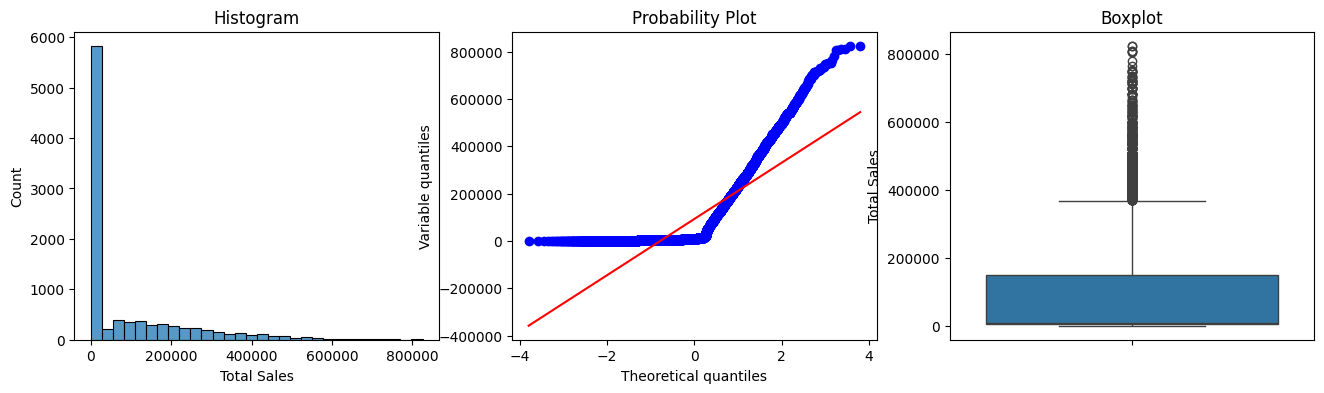

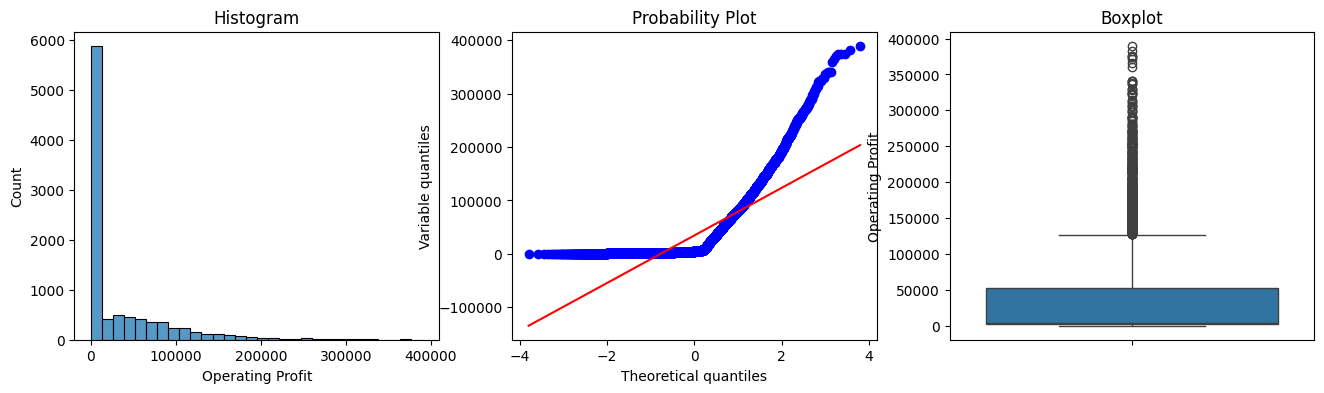

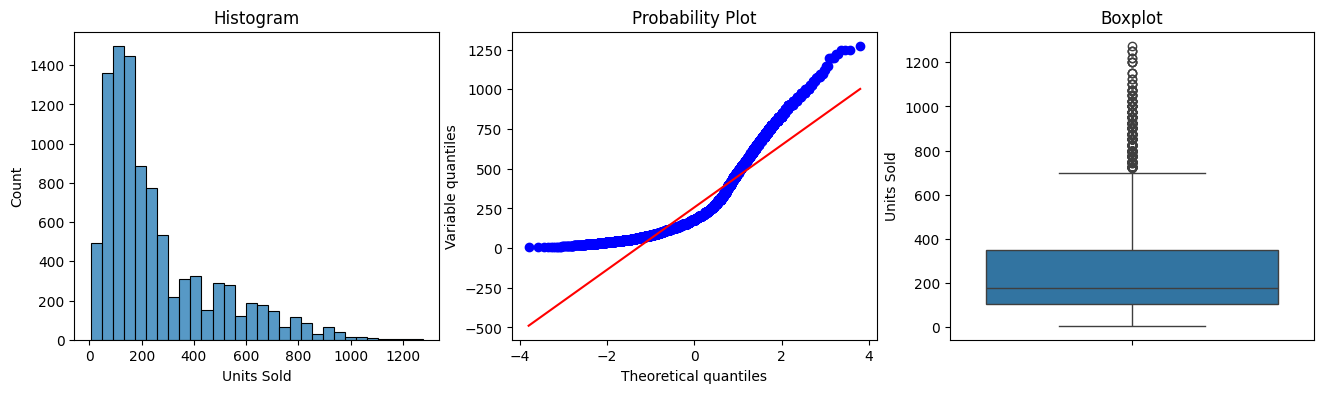

In [ ]:
# memvisualisasikan outlier
for column in data_kolom:
  check_plot(df, column)

terdapat outlier pada Total Sales, Operating Profit, dan Units Sold, tetapi tidak terlalu ekstrem dan masih relevan dengan konteks data.

In [ ]:
# simpan data bersih
df.to_excel('data_clean.xlsx', index=False)

# EDA

In [ ]:
List_Of_Retailers = df["Retailer"].unique()
print(f"The list of Retailers are {List_Of_Retailers}")

The list of Retailers are ['Foot Locker' 'Walmart' 'Sports Direct' 'West Gear' "Kohl's" 'Amazon']


In [ ]:
# Total Transactions of Retailers
Total_Transactions_Of_Retailers = df["Retailer"].value_counts()
print(f"Total Transactions Performed by Retailers: \n{Total_Transactions_Of_Retailers}")

Total Transactions Performed by Retailers: 
Retailer
Foot Locker      2633
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: count, dtype: int64


In [ ]:
fig = go.Figure(data=[go.Pie(
    labels=Total_Transactions_Of_Retailers.index,
    values=Total_Transactions_Of_Retailers,
    hole=.3,
    domain=dict(x=[0.2, 0.8], y=[0.2, 0.8])  # Atur posisi & ukuran pie chart
)])

# Update layout for 3D effect
fig.update_traces(
    marker=dict(line=dict(color='#000000', width=2)),
    textinfo='label+percent',
    pull=[0.1, 0, 0, 0]
)

fig.update_layout(
    title_text='Total Transactions Performed by Retailers',
    annotations=[dict(text='Retailers', x=0.5, y=0.5, font_size=20, showarrow=False)],
    width=800,
    height=750
)

fig.show()


/tmp/ipython-input-843959040.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




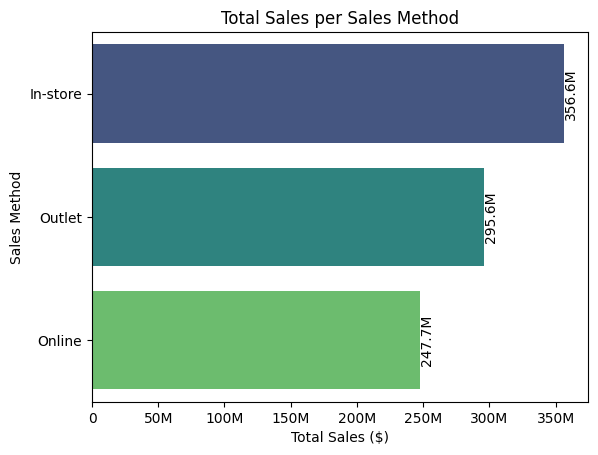

In [ ]:
import matplotlib.ticker as mticker
# Analisis 1: Total Sales per Method
sales_by_channel = df.groupby('Sales Method')['Total Sales'].sum().sort_values(ascending=False)
plt.figure()
# Apply a color gradient from dark to light for higher to lower values
ax = sns.barplot(x=sales_by_channel.values, y=sales_by_channel.index, palette="viridis")
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.0f}M' if x >= 1_000_000 else f'{int(x):,}'))
plt.title("Total Sales per Sales Method")
plt.xlabel("Total Sales ($)")
plt.ylabel("Sales Method")


for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f'{x/1_000_000:.1f}M' if x >= 1_000_000 else f'{int(x):,}', rotation=90)

plt.show()

/tmp/ipython-input-3915433247.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




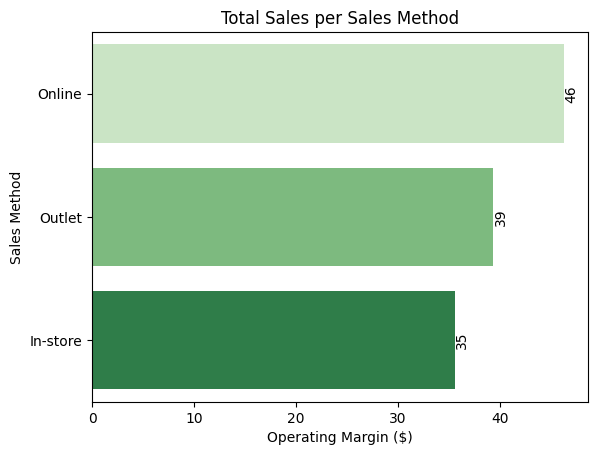

In [ ]:
# Analisis 2: Total Sales per Method
sales_by_channel = df.groupby('Sales Method')['Operating Margin'].mean().sort_values(ascending=False)
plt.figure()
ax = sns.barplot(x=sales_by_channel.values, y=sales_by_channel.index, palette="Greens")
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.0f}M' if x >= 1_000_000 else f'{int(x):,}'))
plt.title("Total Sales per Sales Method")
plt.xlabel("Operating Margin ($)")
plt.ylabel("Sales Method")


for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f'{x/1_000_000:.1f}M' if x >= 1_000_000 else f'{int(x):,}', rotation=90)

plt.show()

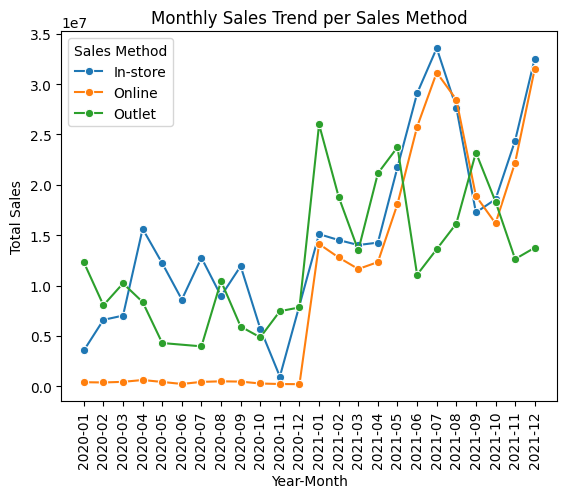

In [ ]:
# Analisis 3: Tren Penjualan per Method (Bulanan)
df['Year-Month'] = df['Invoice Date'].dt.to_period('M')
trend_sales = df.groupby(['Year-Month', 'Sales Method'])['Total Sales'].sum().reset_index()
trend_sales['Year-Month'] = trend_sales['Year-Month'].astype(str)

plt.figure()
sns.lineplot(data=trend_sales, x='Year-Month', y='Total Sales', hue='Sales Method', marker="o")
plt.title("Monthly Sales Trend per Sales Method")
plt.xticks(rotation=90)
plt.show()

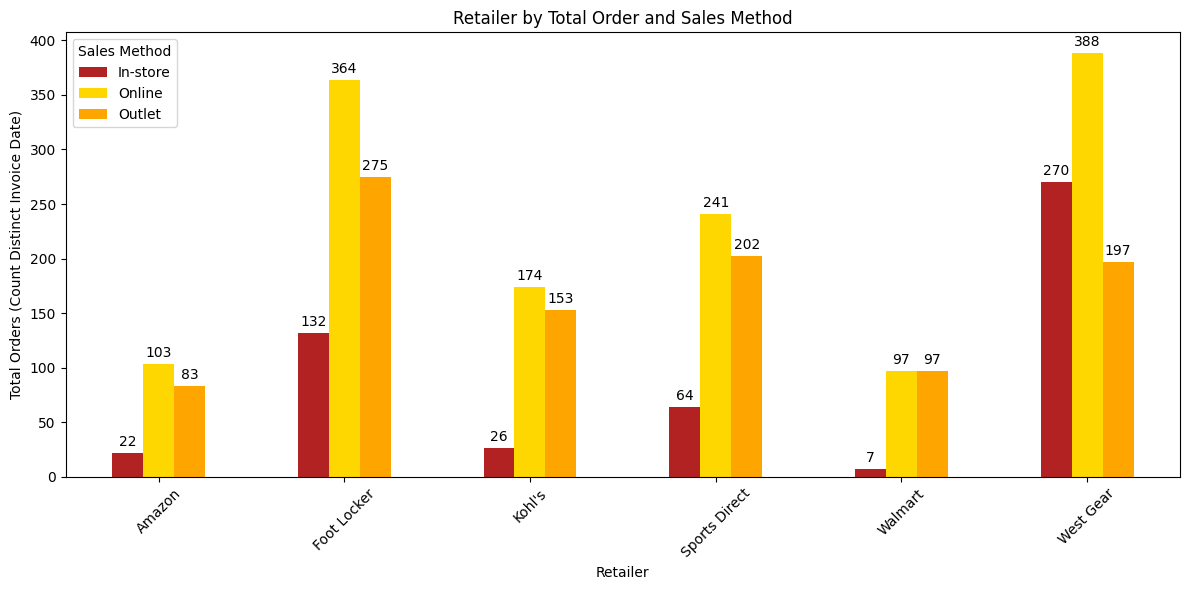

In [ ]:
grouped = df.groupby(['Retailer', 'Sales Method'])['Invoice Date'].nunique().reset_index()
grouped.rename(columns={'Invoice Date': 'Total Orders'}, inplace=True)
pivot_df = grouped.pivot(index='Retailer', columns='Sales Method', values='Total Orders').fillna(0)

# Step 5: Plotting
ax = pivot_df.plot(kind='bar', figsize=(12, 6), color=['firebrick', 'gold', 'orange'])
plt.title('Retailer by Total Order and Sales Method')
plt.xlabel('Retailer')
plt.ylabel('Total Orders (Count Distinct Invoice Date)')
plt.xticks(rotation=45)
plt.legend(title='Sales Method')
plt.tight_layout()

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)


plt.show()

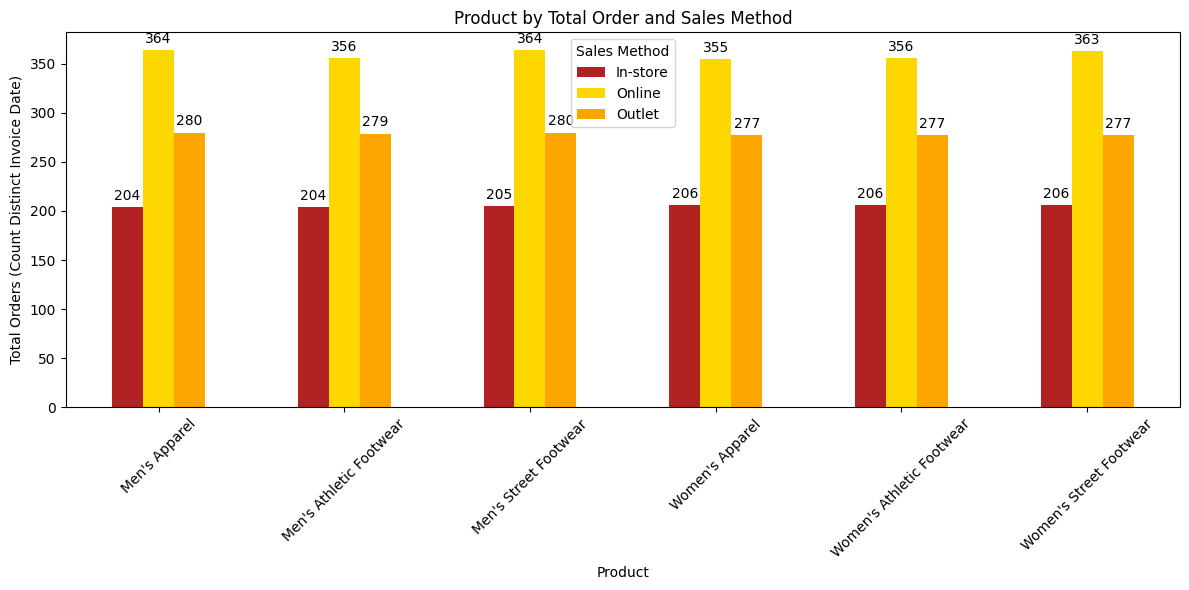

In [ ]:
grouped = df.groupby(['Product', 'Sales Method'])['Invoice Date'].nunique().reset_index()
grouped.rename(columns={'Invoice Date': 'Total Orders'}, inplace=True)
pivot_df = grouped.pivot(index='Product', columns='Sales Method', values='Total Orders').fillna(0)

# Step 5: Plotting
ax = pivot_df.plot(kind='bar', figsize=(12, 6), color=['firebrick', 'gold', 'orange'])
plt.title('Product by Total Order and Sales Method')
plt.xlabel('Product')
plt.ylabel('Total Orders (Count Distinct Invoice Date)')
plt.xticks(rotation=45)
plt.legend(title='Sales Method')
plt.tight_layout()

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)


plt.show()

In [ ]:
# Insight
print("\n--- Insight ---")

# Insight based on Total Sales
print(f"1. Sales tertinggi: {sales_by_channel.index[0]} (${sales_by_channel.iloc[0]:,.2f})") # Corrected access for total sales

# Insight based on Average Operating Margin
top_avg_margin_method = sales_by_channel.index[0] # Get the index (Sales Method name) of the top average margin
top_average_operating_margin = sales_by_channel.iloc[0] # Get the value (Average Operating Margin) of the top average margin
print(f"2. Operating margin (rata-rata) terbaik: {top_avg_margin_method} ({top_average_operating_margin:.2f}%)")



--- Insight ---
1. Sales tertinggi: Online ($46.33)
2. Operating margin (rata-rata) terbaik: Online (46.33%)
